In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import AFAI_library as afai
import AFAI_library_torch as afai_cuda
import AFAI_parallelGPU as afai_parallel
import torch
from concurrent.futures import ThreadPoolExecutor, as_completed
# from mpl_toolkits.mplot3d import Axes3D
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [3]:
%autoreload 2

In [15]:
period = 2
hopping = - 3 * np.pi/(2)
model = afai_cuda.tb_floquet_tbc_cuda(period, 1, hopping, 3,3)
model_gpu = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping, 3,3)

In [30]:
hopping1 = - np.pi/(2)
hopping2 = - 3 * np.pi/(2)
hopping3 = - 5 * np.pi/(2)

In [31]:
model_pest1 = afai_parallel.tb_floquet_pbc_cuda(period, 1, hopping1, num_y=1, device='cuda')
model_pest2 = afai_parallel.tb_floquet_pbc_cuda(period, 1, hopping2, num_y=1, device='cuda')
model_pest3 = afai_parallel.tb_floquet_pbc_cuda(period, 1, hopping3, num_y=1, device='cuda')

In [32]:
branch_cut_angles = torch.linspace(-torch.pi, torch.pi, 30)

tensor(0., device='cuda:0', dtype=torch.float64)
tensor([-4.6350e-18,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  2.5872e-02,  1.0240e-01,  2.0265e-04, -1.5796e-09,
        -1.5796e-09, -1.5796e-09, -1.5796e-09, -1.5796e-09, -1.5796e-09,
        -1.5796e-09, -1.5796e-09, -1.5796e-09, -1.5796e-09, -1.5796e-09,
        -1.5796e-09,  2.0265e-04,  1.0240e-01,  2.5872e-02, -4.6350e-18,
        -4.6350e-18, -4.6350e-18, -4.6350e-18, -4.6350e-18,  0.0000e+00],
       device='cuda:0')


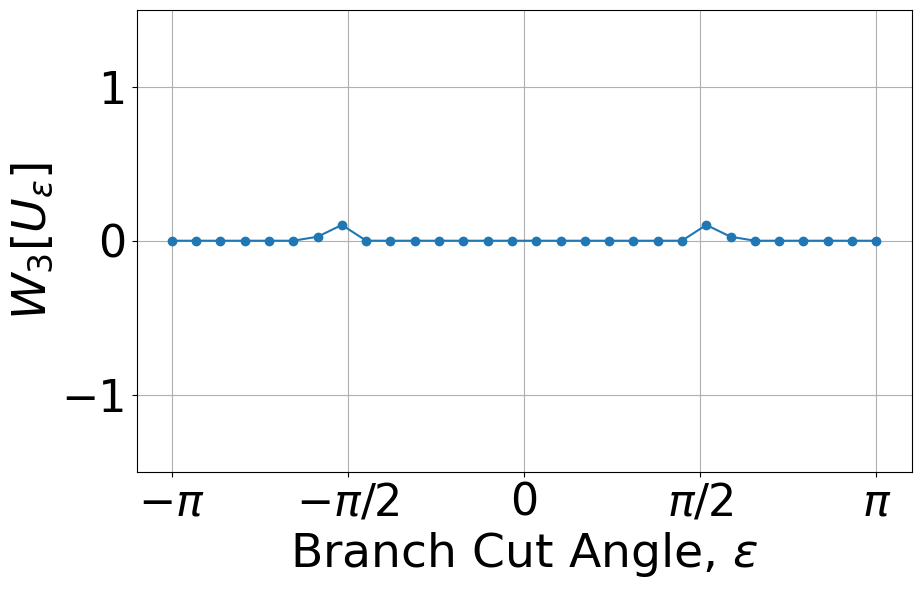

In [58]:
w1 = model_pest1.winding3(0, 5, 100, branch_cut_angles, plot=True)

($i_1, i_2, i_3$) 23 23 15
p tensor([6.0214, 6.0214, 1.2500], device='cuda:0', dtype=torch.float64)
$C_p$ tensor([ 1., -1.], device='cuda:0', dtype=torch.float64)
$M_p$ tensor([1., 0.], device='cuda:0', dtype=torch.float64)
$F_p$ tensor([[-0.0777,  0.0777],
        [-0.0390,  0.0390],
        [-0.0959,  0.0959]], device='cuda:0', dtype=torch.float64)
$m_p$ tensor([[0, 0],
        [0, 0],
        [0, 0]], device='cuda:0')


tensor(1., device='cuda:0', dtype=torch.float64)
tensor([ 1.9607e-17,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -5.6390e-01, -7.0700e-01, -7.9778e-01, -8.5436e-01, -7.1955e-01,
        -8.3167e-01, -8.7077e-01, -9.4253e-01, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -9.4253e-01, -8.7077e-01, -8.3167e-01,
        -7.1955e-01, -8.5436e-01, -7.9778e-01, -7.0700e-01, -5.6390e-01,
         1.9607e-17,  1.9607e-17,  1.9607e-17,  1.9607e-17,  0.0000e+00],
       device='cuda:0')


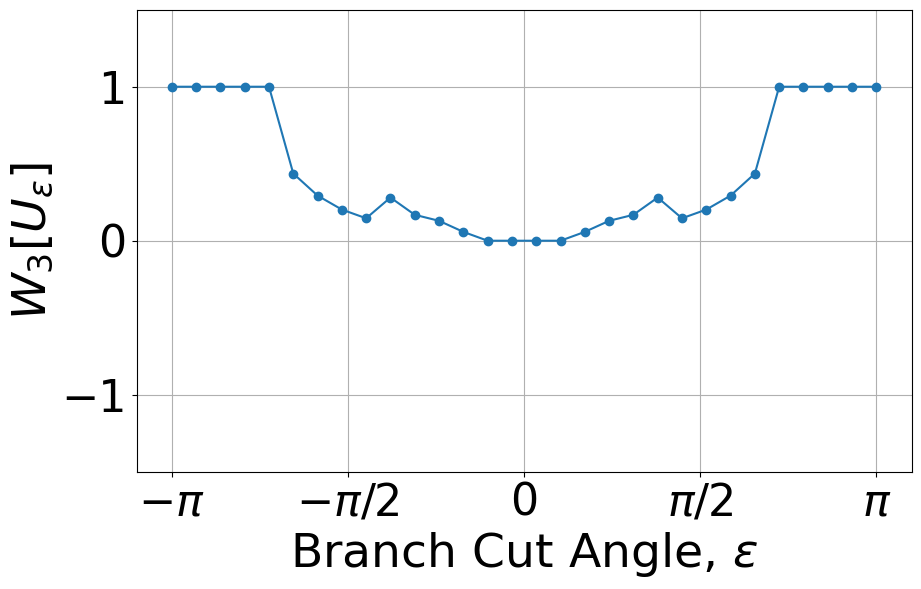

In [51]:
w2 = model_pest2.winding3(0, 24, 100, branch_cut_angles, plot=True)

($i_1, i_2, i_3$) 23 23 15
p tensor([6.0214, 6.0214, 1.2500], device='cuda:0', dtype=torch.float64)
$C_p$ tensor([ 1., -1.], device='cuda:0', dtype=torch.float64)
$M_p$ tensor([1., 0.], device='cuda:0', dtype=torch.float64)
$F_p$ tensor([[-0.0777,  0.0777],
        [-0.0390,  0.0390],
        [-0.0959,  0.0959]], device='cuda:0', dtype=torch.float64)
$m_p$ tensor([[0, 0],
        [0, 0],
        [0, 0]], device='cuda:0')


tensor(1., device='cuda:0', dtype=torch.float64)
tensor([ 1.9607e-17,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -5.6390e-01, -7.0700e-01, -7.9778e-01, -8.5436e-01, -7.1955e-01,
        -8.3167e-01, -8.7077e-01, -9.4253e-01, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -9.4253e-01, -8.7077e-01, -8.3167e-01,
        -7.1955e-01, -8.5436e-01, -7.9778e-01, -7.0700e-01, -5.6390e-01,
         1.9607e-17,  1.9607e-17,  1.9607e-17,  1.9607e-17,  0.0000e+00],
       device='cuda:0')


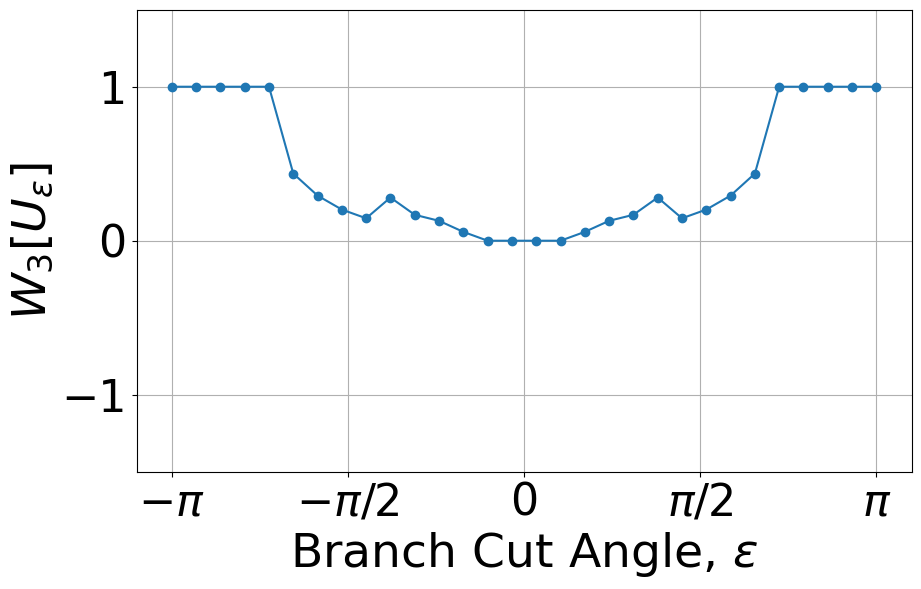

In [74]:
w2 = model_pest2.winding3(0, 24, 100, branch_cut_angles, plot=True)

In [ ]:
w2 = model_pest2.winding3(0, 50, 100, branch_cut_angles, plot=True)

($i_1, i_2, i_3$) 0 0 1
p tensor([0.0000, 0.0000, 0.4000], device='cuda:0', dtype=torch.float64)
$C_p$ tensor([-1.,  1.], device='cuda:0', dtype=torch.float64)
$M_p$ tensor([1., 0.], device='cuda:0', dtype=torch.float64)
$F_p$ tensor([[ 0.4793, -0.4793],
        [-0.1683,  0.1683],
        [-0.0044,  0.0044]], device='cuda:0', dtype=torch.float64)
$m_p$ tensor([[0, 0],
        [0, 0],
        [0, 0]], device='cuda:0')


($i_1, i_2, i_3$) 0 0 2
p tensor([0.0000, 0.0000, 0.8000], device='cuda:0', dtype=torch.float64)
$C_p$ tensor([ 1., -1.], device='cuda:0', dtype=torch.float64)
$M_p$ tensor([1., 0.], device='cuda:0', dtype=torch.float64)
$F_p$ tensor([[-0.0314,  0.0314],
        [-0.1949,  0.1949],
        [-0.4128,  0.4128]], device='cuda:0', dtype=torch.float64)
$m_p$ tensor([[0, 0],
        [0, 0],
        [0, 0]], device='cuda:0')


($i_1, i_2, i_3$) 0 2 3
p tensor([0.0000, 2.5133, 1.2000], device='cuda:0', dtype=torch.float64)
$C_p$ tensor([-1.,  1.], device='cuda:0', dtype=torch.f

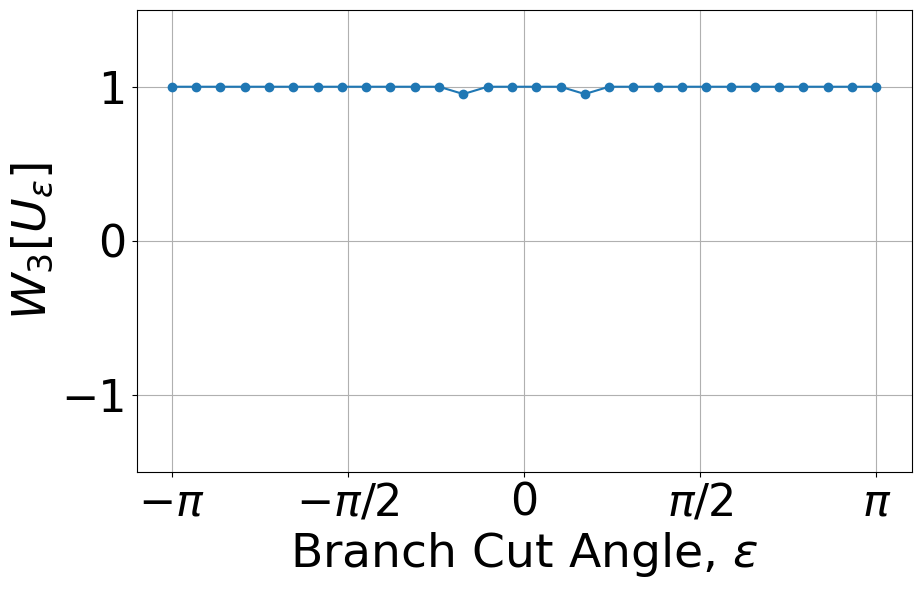

In [57]:
w3 = model_pest3.winding3(0, 5, 100, branch_cut_angles, plot=True)

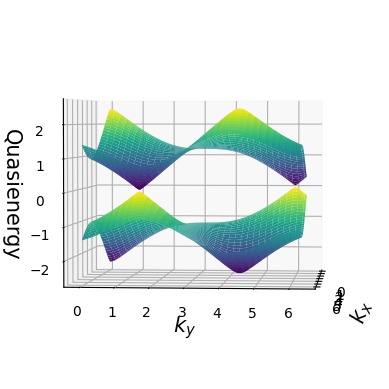

In [21]:
aa = model_pest2.quasienergy_eigenstates(1.189, 100, 100, plot=True, pbc='xy')

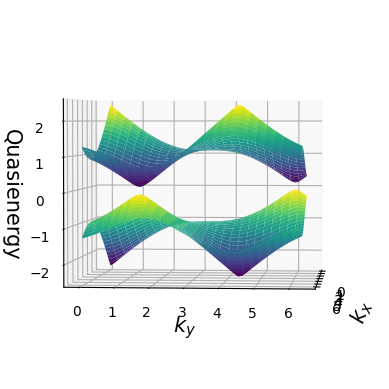

In [18]:
aa = model_pest2.quasienergy_eigenstates(1.25, 50, 100, plot=True, pbc='xy')

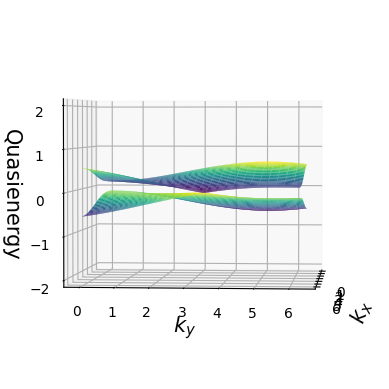

In [37]:
aa = model_pest3.quasienergy_eigenstates(1.52, 50, 100, plot=True, pbc='xy')

In [37]:
tx = torch.tensor([1,2,3], device='cuda:0')
ty = torch.tensor([1,2,3], device='cuda:0')
vd1 = 2
vd2 = torch.tensor([1,2,3], device='cuda:0')

In [27]:
H1 = model_gpu.Hamiltonian_tbc1(ty, tbc='y')
print(H1)

tensor([[[ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  2.3562-0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
           1.2731-1.9827j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
           0.0000+0.0000j,  2.3562-0.0000j],
         [ 2.3562+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  1.2731+1.9827j,  0.0000+0.0000j,  0.0000+0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.0000+0.0000j,  2.3562+0.0000j,  0.0000+0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j]],

        [[ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  2.3562-0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
          -0.9805-2.1425j,  0.0000+0.0000j],
         [ 0.0

In [28]:
H2 = model_gpu.Hamiltonian_tbc2(tx, tbc='xy')
print(H2)

tensor([[[0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 2.3562-0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 2.3562+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 2.3562-0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 2.3562+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j]],

        [[0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 2.3562-0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 2.3562+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 2.3562-0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 2.3562+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j]],



In [29]:
H3 = model_gpu.Hamiltonian_tbc3(1, tbc='y')
print(H3)

tensor([[[0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 1.2731-1.9827j,
          0.0000+0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
          2.3562-0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
          0.0000+0.0000j, 1.2731-1.9827j],
         [1.2731+1.9827j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
          0.0000+0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 2.3562+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
          0.0000+0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 0.0000+0.0000j, 1.2731+1.9827j, 0.0000+0.0000j,
          0.0000+0.0000j, 0.0000+0.0000j]]], device='cuda:0',
       dtype=torch.complex128)


In [59]:
H4 = model_gpu.Hamiltonian_tbc4(1, tbc='xy')
print(H4.shape)

torch.Size([9, 9])


-1.0 0.26625505089759827


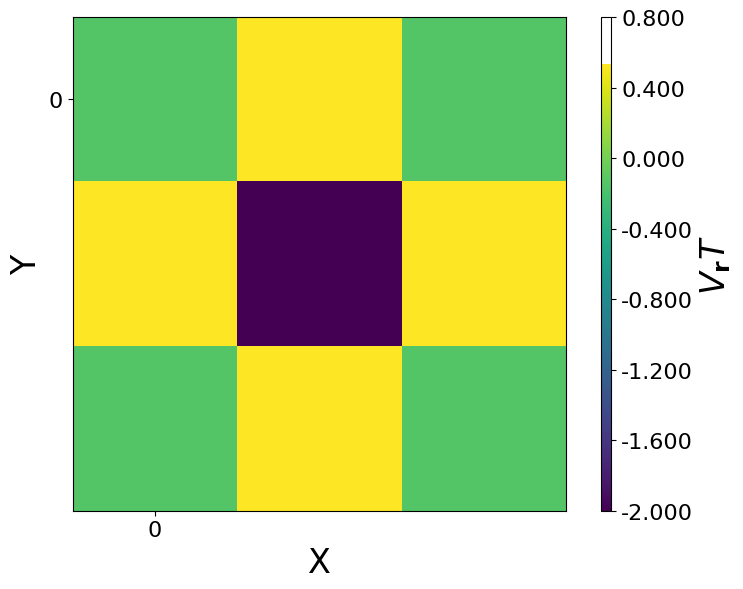

In [45]:
H_ap = model_gpu.aperiodic_Honsite(vd2, contourplot=True)
# print(H_ap)

In [54]:
H_dis = model_gpu.Hamiltonian_disorder(vd1, contourplot=False)
print(H_dis.shape)

torch.Size([1, 9, 9])


In [58]:
H_dis = model_gpu.Hamiltonian_onsite(vd2, fully_disorder=False)
print(H_dis.shape)
print(H_dis)

torch.Size([3, 9, 9])
tensor([[[ 0.7145+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j, -0.5191+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.7145+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  1.0517+0.j,  0.0000+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j, -1.7854+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  1.0517+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
           0.7145+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:1640: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rotation_angle_tensor = torch.tensor(rotation_angle, device=self.device)  # Convert to tensor


In [9]:
theta_x = np.array([0, np.pi/2, np.pi, 3*np.pi/2])
theta_y = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
vd = np.array([1, 2], dtype=np.float64)
vd1 = 2
theta_y1 = np.array([1])
t = np.array([1, 1.5, 2, 2.5, 3])
t1 = np.array([1])
# aa= model_gpu.Hamiltonian_tbc(1, 'xy', vd, np.pi/4, theta_x, theta_y)
# print(aa.shape)

In [10]:
bb = model_gpu.time_evolution_operator1(t1, 100, 'xy', vd, np.pi/4, theta_x, theta_y1)
print(bb.shape)

torch.Size([2, 4, 9, 9])


In [75]:
period1 = 1
period2 = 100
hopping3 = - 5 * np.pi/(2)
model_afai2 = afai_parallel.tb_floquet_tbc_cuda(period1, 1, hopping3, ny = 4, nx = 4, device='cuda:0')
model_afai3 = afai_parallel.tb_floquet_tbc_cuda(period2, 1, hopping3, ny = 4, nx = 4, device='cuda:0')

In [18]:
vd = torch.linspace(0.5, 4, 11)

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:1635: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rotation_angle_tensor = torch.tensor(rotation_angle, device=self.device)  # Convert to tensor


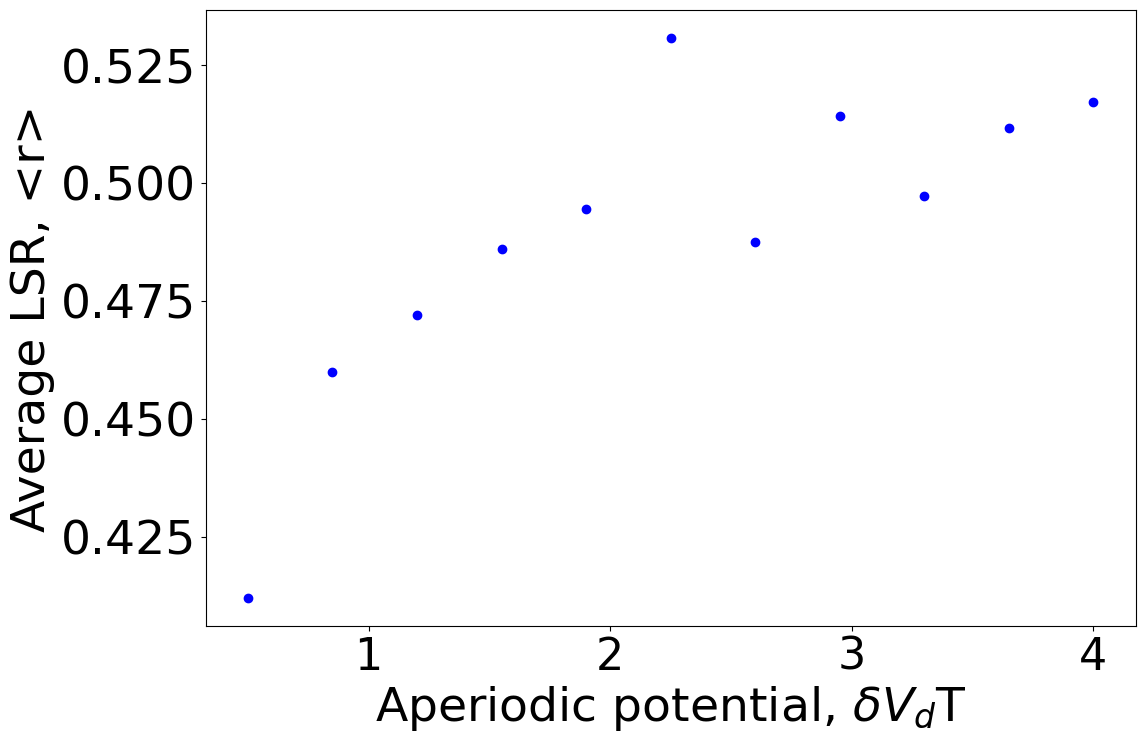

In [20]:
avg_LSR1 = model_afai2.avg_level_spacing_bulk(100, vd, fully_disorder= False ,plot=True)

In [21]:
model101 = afai_parallel.tb_floquet_pbc_cuda(period1, 1, hopping3, 20, device='cuda:0')

torch.Size([11, 40])
[[-2.92511529 -2.6741512  -2.5417021  -2.38455429 -2.22081449 -2.05859518
  -1.9028695  -1.75757776 -1.62634099 -1.51264262 -1.41976124 -1.35279084
  -1.35017789 -1.336338   -1.32085015 -1.30081365 -1.29769474 -1.28138461
  -1.26890518 -1.24834441  1.24834441  1.26890518  1.28138461  1.29769474
   1.30081365  1.32085015  1.336338    1.35017789  1.35279084  1.41976124
   1.51264262  1.62634099  1.75757776  1.9028695   2.05859518  2.22081449
   2.38455429  2.5417021   2.6741512   2.92511529]
 [-2.92511529 -2.6741512  -2.5417021  -2.38455429 -2.22081449 -2.05859518
  -1.9028695  -1.75757776 -1.62634099 -1.51264262 -1.41976124 -1.35279084
  -1.35017789 -1.336338   -1.32085015 -1.30081365 -1.29769474 -1.28138461
  -1.26890518 -1.24834441  1.24834441  1.26890518  1.28138461  1.29769474
   1.30081365  1.32085015  1.336338    1.35017789  1.35279084  1.41976124
   1.51264262  1.62634099  1.75757776  1.9028695   2.05859518  2.22081449
   2.38455429  2.5417021   2.6741512   2

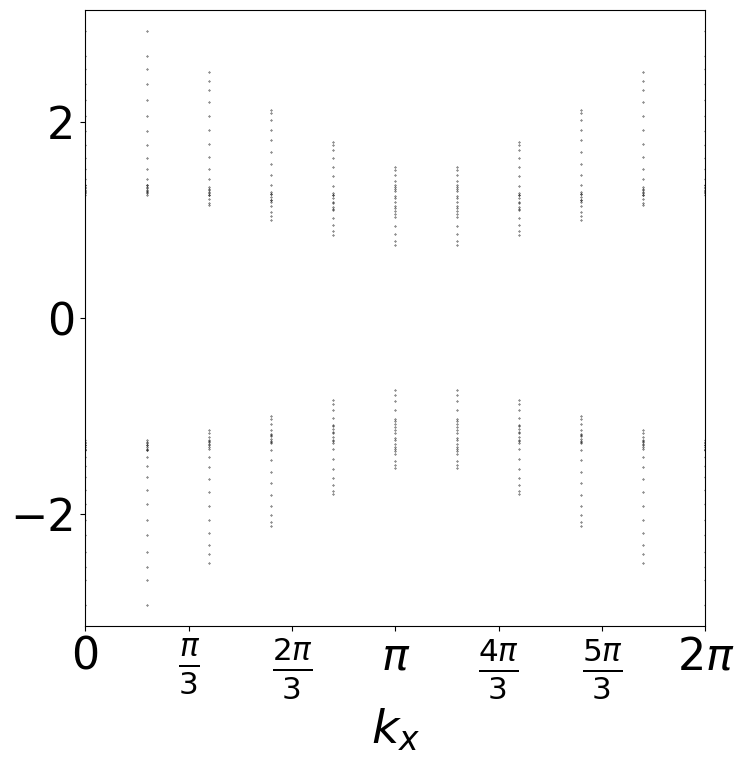

In [23]:
quasi = model101.quasienergy_eigenstates(10, 100, plot=True)

In [43]:
vdT = torch.tensor([1,2,3], device='cuda:0')

In [89]:
thetax, thetay = model_afai2.get_theta_values(40, 'xy')

phi1 is 0 phi2 is 0


c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:2852: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  


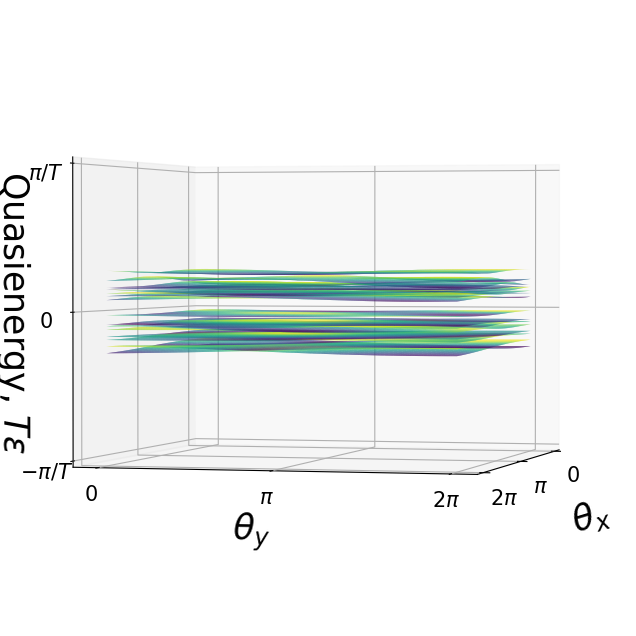

In [100]:
a = model_afai2.quasienergies_states_bulk(100, 0.5, thetax, thetay, fully_disorder=False, plot=True, save_path='bulk_05_quasi.pdf')

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:2852: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  


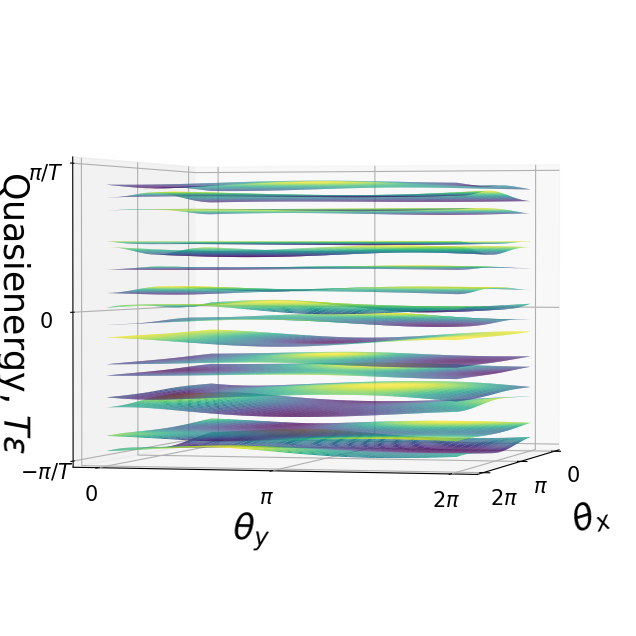

In [97]:
a = model_afai2.quasienergies_states_bulk(100, 30, thetax, thetay, fully_disorder=True, plot=True, save_path='bulk_30.pdf')

phi1 is 0 phi2 is 0


c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:2852: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  


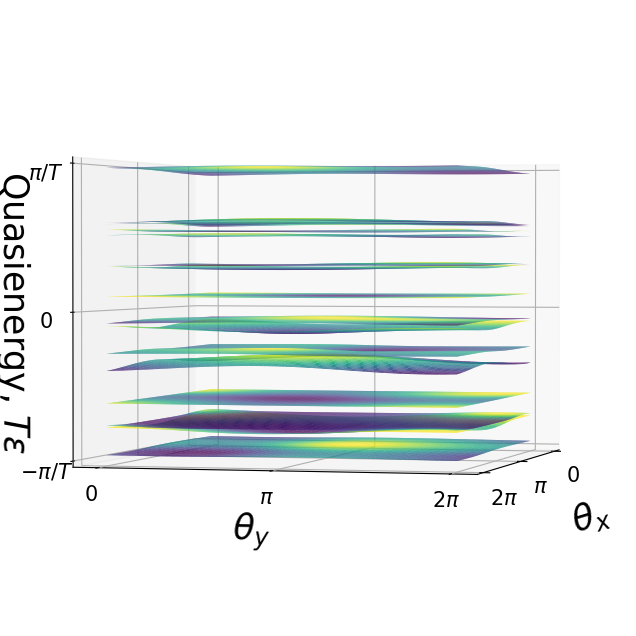

In [98]:
a = model_afai2.quasienergies_states_bulk(100, 30, thetax, thetay, fully_disorder=False, plot=True, save_path='bulk_80_quasi.pdf')

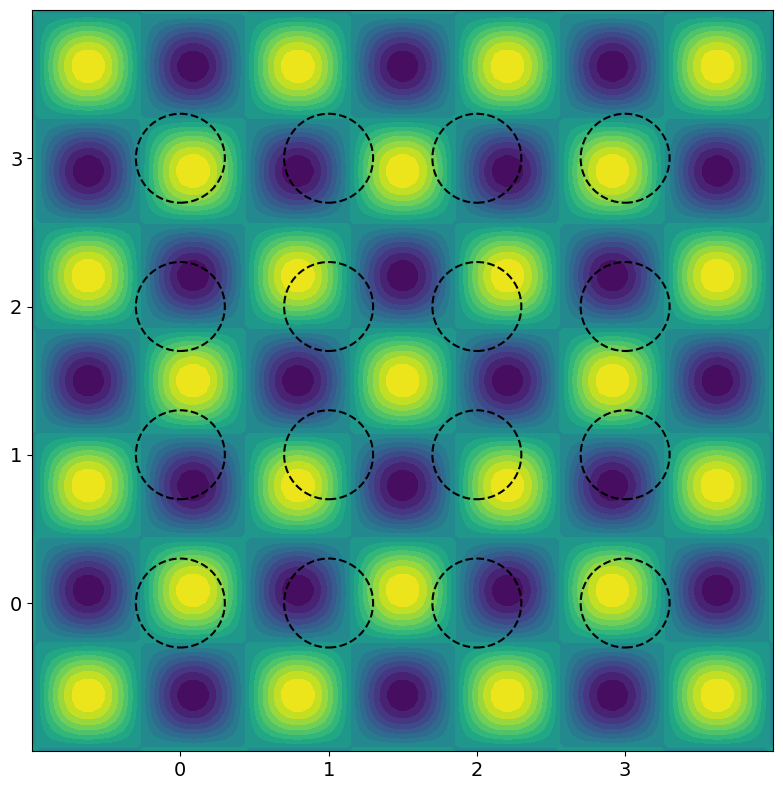

In [111]:
model_afai2.visualise_quasiperiodic(phi1_ex=0, phi2_ex=0)

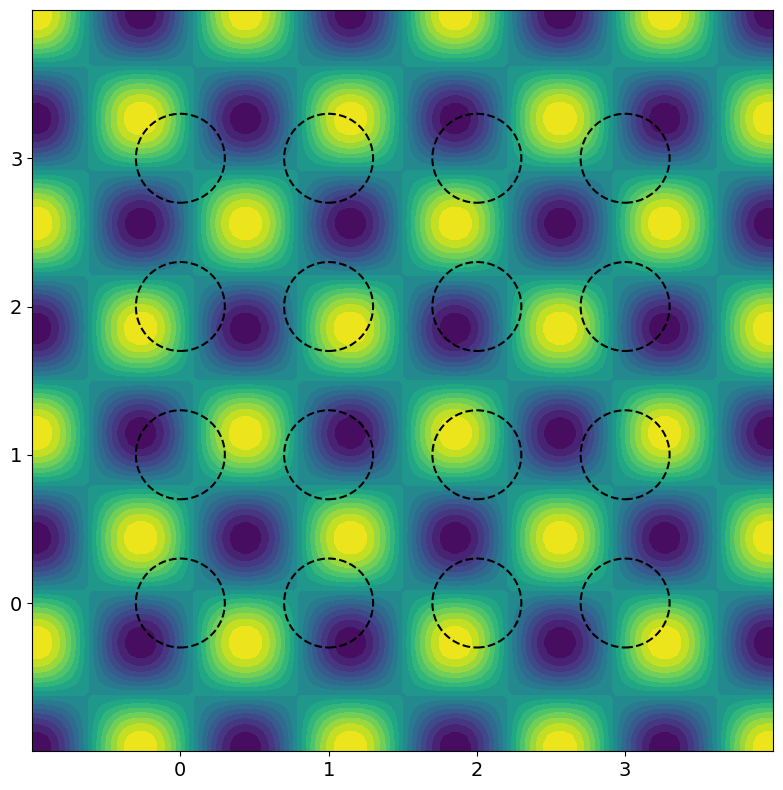

In [113]:
model_afai2.visualise_quasiperiodic(phi1_ex=np.pi, phi2_ex=0)

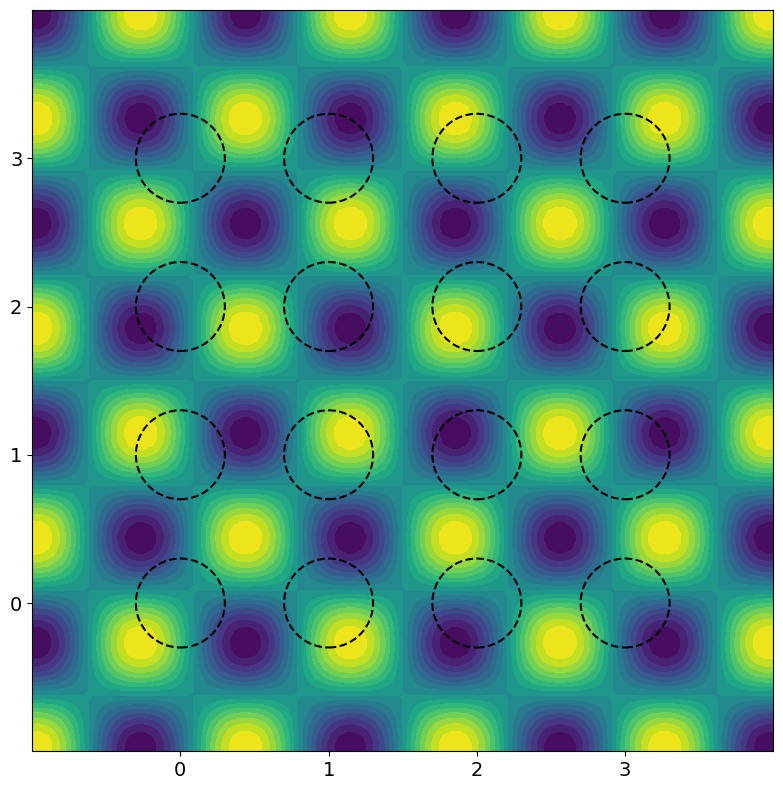

In [112]:
model_afai2.visualise_quasiperiodic(phi1_ex=0, phi2_ex=np.pi)

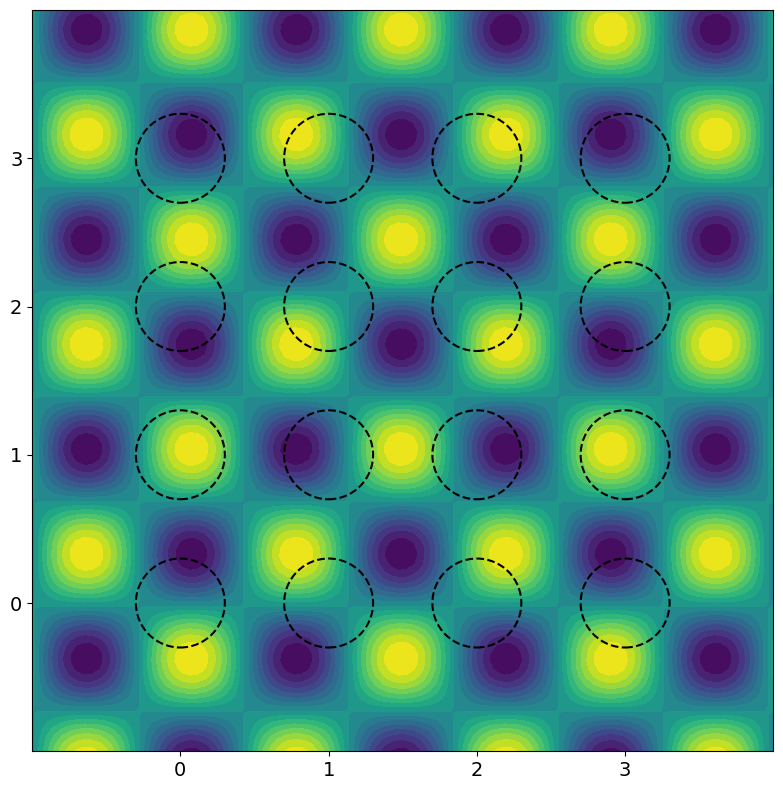

In [110]:
model_afai2.visualise_quasiperiodic(phi1_ex=2, phi2_ex=np.pi*2/3)